In [1]:
#|default_exp app2

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

In [3]:
# from fastbook import *

# download_url(search_images_ddg('dog', max_images=1)[0], 'images/dog.jpg', show_progress=False)
# download_url(search_images_ddg('cat', max_images=1)[0], 'images/cat.jpg', show_progress=False)

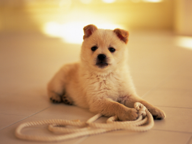

In [4]:
im = PILImage.create('images/dog.jpg')
im.thumbnail((192,192))
im

In [5]:
#|export
learn = load_learner('model.pkl')

In [6]:
%time learn.predict(im)
# %time is a jupyter tool

CPU times: user 217 ms, sys: 6.17 ms, total: 223 ms
Wall time: 234 ms


('False', TensorBase(0), TensorBase([9.9996e-01, 4.4761e-05]))

In [7]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [8]:
classify_image(im)

{'Dog': 0.9999552965164185, 'Cat': 4.476078174775466e-05}

OBS: o uso do inputs foi deprecado

In [9]:
# image = gr.inputs.Image(shape=(192,192))
# label = gr.inputs.Label()

In [10]:
#|export
image = gr.Image(shape=(192,192))
label = gr.Label()
examples = ['images/dog.jpg', 'images/cat.jpg', 'images/dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f40b3de7940>, 'http://127.0.0.1:7860/', None)

In [11]:
from nbdev.export import notebook2script
notebook2script('app.ipynb')

PermissionError: [Errno 13] Permission denied: '/settings.ini'